
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
# <p style="text-align: center;">Justin Wagers: jww3243</p> 
# <p style="text-align: center;">Brett Nesfeder:</p> 
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, September 14 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so, please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise.

A music producer asked the data science team to analyze data that included top songs and attributes of the songs which included popularity. Song attributes included artist and genre as well as ratings for loudness, energy, and duration among several others. The data science team decided to use the popularity variable as their target variable in order to determine what makes a top song so popular and stand out from the other top songs. They ran this data through different models including linear and logistic regression as well as a tree model. Unfortunately, after completing this analysis on the data, they realized this same analysis had been done previously by a separate team of data scientists. After comparing results, the analyses were discovered to be very similar. Therefore, this data science team had solved the problem, but had not realized it had already been solved.

# Question 2: Guess the coin (5+5 = 10 points)

Assume we are playing a guessing game with a friend. The friend has three coins at hand:
* **Coin A**: a fair coin with equal probability of being head (H ) or tail (T)
* **Coin B**: a biased coin with a probability of 0.75 being head (H)
* **Coin C**: a coin with a probability of $P^*(H)$ being head (H)

The friend secretly picked one of the coins, randomly flipped it a few times, and get a sequence of *HTHHTT* (all of which come from the same coin he picked). 

1. If you had to choose between whether **Coin A** or **Coin B** was used, and you prefer the one which is more likely, which one will you choose?  (5 points)
2. What would be the value of  $P^*(H)$ such that **Coin C** corresponds to the most likely (among infinite possible coins) coin to have produced the observed sequence?(i.e. provide  an analytical derivation for $P^*(H)$ using maximum likelihood estimation (MLE))."

Part 1: Coin A because Heads occurs 3 times and Tails occurs 3 times in the 6 times the friend flips the coin. Coin A has equal probability of being either Heads or Tails which is exactly what he flips. If I would choose Coin B, I would be less likely to get an equal split (3 Heads and 3 Tails) because Coin B is biased towards Heads (.75). Therefore, it is more likely my friend was using Coin A to get the given sequence.

Part 2: For this function, x=1 means heads with probability  𝑃∗(𝐻)  or simply p in this case, and x=0 means tails with probability  1−𝑃∗(𝐻)  or 1-p. Our maximum likelihood function equals:
$$𝑝^𝑥(1−𝑝)^{1−𝑥}$$
since it is the probility of x being heads times the probability of x being tails. Since we are looking for probability of heads specifically, let us modify this equation to: 
$$𝑝^ℎ(1−𝑝)^{x-ℎ}$$
where p is probability, h is the coin landing on heads, and n is the number of flips. To simplify the function, let's take the log likelihood of it making it now: 
$$ℎ×𝑙𝑜𝑔(𝑝)+(𝑛−ℎ)×𝑙𝑜𝑔(1−𝑝)$$
From here we can maximize our log likelihood function by taking the derivitive and then solving for p. The derivative with respect to p gives us: 
$$\frac{h}{p} - \frac{n-h}{1-p}=0$$
Solving further gives:
$$\frac{h-pn}{p(1-p)}=0$$

When we solve for p, we get :
$$𝑝=\frac{ℎ}{𝑛} $$
meaning the probability is the number of heads over the number of flips. In our case, that would be  $$\frac{3}{6}$$  or 0.5, meaning the value of  𝑃∗(𝐻)  would be equal to 0.5.


## Answer

# Question 3: Multiple Linear Regression (30 pts)

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be developed using machine friendly data and the weight of fish can be predicted. Use the following code to import the Fish market prices dataset in python. The dataset is taken from https://www.kaggle.com/aungpyaeap/fish-market.

In [298]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None



df = pd.read_csv(r"C:\Users\justi\OneDrive\Documents\data.csv", index_col = 0)
df.head()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Here,
1. Species: Species name of fish
2. Weight: Weight of fish in gram
3. Length1: Vertical length in cm
4. Length2: Diagonal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Diagonal width in cm

In [299]:
df = df.fillna(0)
X = df.drop(['Weight'], axis=1)
y = df['Weight']

Consider the `Weight` column to be your target variable.

a. (2 pts)  Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b. (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE). Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c. (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.25 and random_state = 50. Fit an MLR using the training set. Evaluate the trained model using the training set and the test set, respectively. Compare the two MAE values thus obtained. Report the [$R^2$ (coefficient of determination)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) value.

d. (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set. Report the variables which have magnitude of correlation greater than 0.8 w.r.t the variable 'Length2'. Now, plot a pairplot based on Species column as seen in the 2nd plot [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html). How does the pairplot validate your previous answer?

e. (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE and $R^2$. Explain the results.

f. (5 pts) Rank the features in descending order based on their significance. You might find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html.

g. (Bonus question - 5 pts) Use the Species column for one-hot encoding and perform part c of this question. Explain your results.

## Answer

a.

In [300]:
from patsy import dmatrices
import numpy as np
formula = 'Weight ~ Length1 + Length2 + Length3 + Height + Width'
Y, X = dmatrices(formula, df, return_type = 'dataframe')
y = Y['Weight'].values

print(X.shape)
print('number of rows is', len(X))
print('number of columns is', len(X.columns))

print(X[:5])

(159, 6)
number of rows is 159
number of columns is 6
         Intercept  Length1  Length2  Length3   Height   Width
Species                                                       
Bream          1.0     23.2     25.4     30.0  11.5200  4.0200
Bream          1.0     24.0     26.3     31.2  12.4800  4.3056
Bream          1.0     23.9     26.5     31.1  12.3778  4.6961
Bream          1.0     26.3     29.0     33.5  12.7300  4.4555
Bream          1.0     26.5     29.0     34.0  12.4440  5.1340


b.

In [301]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X, y)
print('Coefficients:', reg.coef_)
predictions = reg.predict(X)

print('Mean absolute error:', mean_absolute_error(y, predictions))



Coefficients: [  0.          62.35521443  -6.52675249 -29.02621861  28.29735132
  22.47330665]
Mean absolute error: 91.78724088307973


c.

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_tr, x_te, y_tr, y_te = train_test_split(X, y, test_size = 0.25, random_state = 50)

model = reg.fit(x_tr, y_tr)
predictions = model.predict(x_tr)

print('Mean absolute error (train data):', mean_absolute_error(y_tr, predictions))
print('R^2 score (train):', r2_score(y_tr, predictions))

testpredictions = model.predict(x_te)
print('Mean absolute error (test data):', mean_absolute_error(y_te, testpredictions))
print('R^2 score (test):', r2_score(y_te, testpredictions))

Mean absolute error (train data): 84.82479753198541
R^2 score (train): 0.878916337517605
Mean absolute error (test data): 101.89481945056993
R^2 score (test): 0.8919608385022907


The MAE for the test set is expectedly higher, at 101.89 versus 84.82 for the training set. 

d.

           Intercept   Length1   Length2   Length3    Height     Width
Intercept        NaN       NaN       NaN       NaN       NaN       NaN
Length1          NaN  1.000000  0.999399  0.990034  0.587997  0.845798
Length2          NaN  0.999399  1.000000  0.992702  0.606298  0.853645
Length3          NaN  0.990034  0.992702  1.000000  0.678908  0.858384
Height           NaN  0.587997  0.606298  0.678908  1.000000  0.766986
Width            NaN  0.845798  0.853645  0.858384  0.766986  1.000000


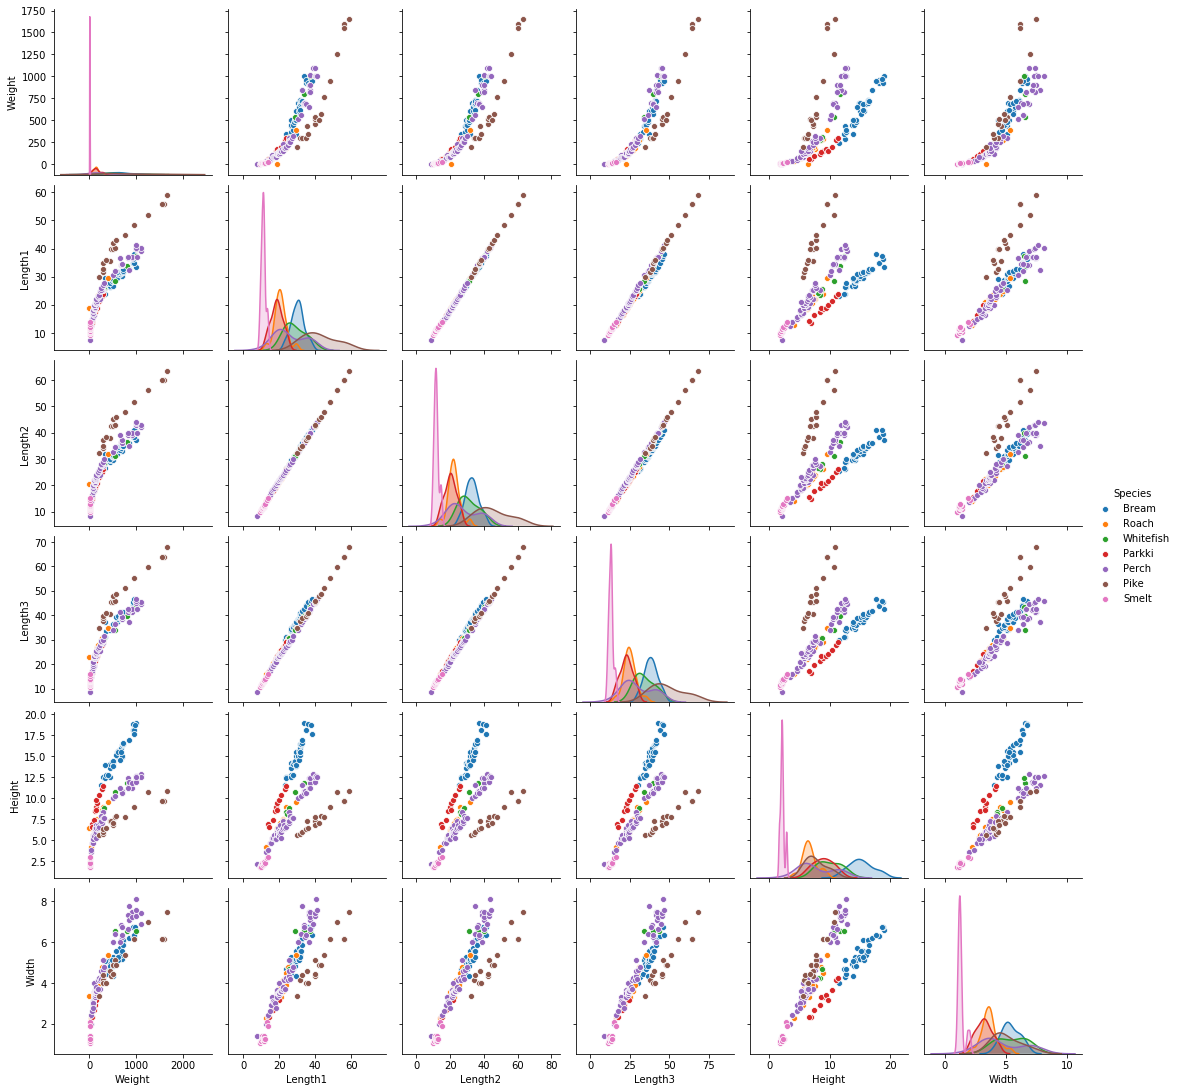

In [303]:
print(x_tr.corr())

from seaborn import pairplot

df['Species'] = df.index
pairplot(df, hue = "Species")


Length1, Length3, and Width all have a magnitude of correlation greater than 0.8 with the variable Length2.

This is confirmed by looking at pair plots: we can see a very distinct linear relationship between the length variables, as well as between length2 and width. However, length2's correlation with height seems to be very species dependent, and is not as correlated of a relationship amongst all species. 

e.

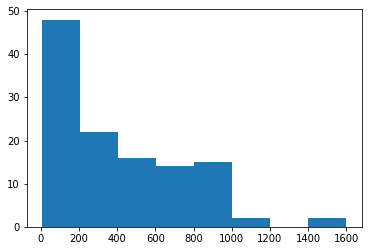

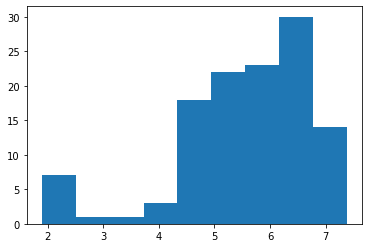

Mean absolute error (test data): 176.83493472388966
R^2 score (test): -0.46121979019956916


In [305]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(y_tr, bins = 'auto')
plt.show()

y_tr_log = np.log(y_tr)
plt.hist(y_tr_log, bins = 'auto')
plt.show()

reg.fit(x_tr, y_tr_log)

testpredictions = reg.predict(x_te)
testpredictions = np.exp(testpredictions)
print('Mean absolute error (test data):', mean_absolute_error(y_te, testpredictions))
print('R^2 score (test):', r2_score(y_te, testpredictions))

We can visually see how the log transformation affects the data distribution in the two histograms above from right tail to left tail. Interestingly, after the log transformation, our test MAE increases significantly to 176, and a negative R^2 value indicates a poor fit. 

f.

Feature: 0, Score: 0.00000
Feature: 1, Score: 62.35521
Feature: 2, Score: -6.52675
Feature: 3, Score: -29.02622
Feature: 4, Score: 28.29735
Feature: 5, Score: 22.47331


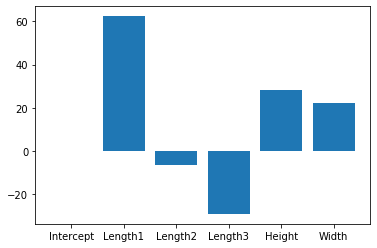

In [306]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

reg = LinearRegression()
reg.fit(X, y)
importance = reg.coef_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([col for col in X.columns], importance)
pyplot.show()


Ranked in order of (absolute) magnitude of importance:
Length1
Length3
Height
Width
Length2


g.

In [307]:
df['Species'] = df.index

formula = 'Weight ~ Length1 + Length2 + Length3 + Height + Width+Species'
Y, X = dmatrices(formula, df, return_type = 'dataframe')
y = Y['Weight'].values

x_tr, x_te, y_tr, y_te = train_test_split(X, y, test_size = 0.25, random_state = 50)

model = reg.fit(x_tr, y_tr)
predictions = model.predict(x_tr)

print('Mean absolute error (train data):', mean_absolute_error(y_tr, predictions))
print('R^2 score (train):', r2_score(y_tr, predictions))

testpredictions = model.predict(x_te)
print('Mean absolute error (test data):', mean_absolute_error(y_te, testpredictions))
print('R^2 score (test):', r2_score(y_te, testpredictions))



Mean absolute error (train data): 57.96404800546134
R^2 score (train): 0.9463762188356687
Mean absolute error (test data): 89.2053275569003
R^2 score (test): 0.8885793687939447


When including the species as a categorical variable, we can see that the linear regression model achieves a significantly better fit, with an MAE of 86. This additional information seems important when predicting the weight of fish. 

# Question 4 (30 pts)

Using the same data from the previous question, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Use the same train and test data with additional augmented columns from before. Scale the data so that each of the independent variables have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

    from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

5) Why did we have to scale the data before regularization? (5pts)

## Answer

1.

In [308]:
from sklearn import preprocessing
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
xtr_scaled = preprocessing.scale(x_tr)
kf = KFold(5)

alphas =  10**np.linspace(10,-2,100)*0.5
for k, (train_index, test_index) in enumerate(k_fold.split(xtr_scaled, y_tr)):
    x_train = xtr_scaled[train_index]
    x_test = xtr_scaled[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    minMAE = 500
    alpha = 9
    for a in alphas:
        Ridgereg = linear_model.Ridge(alpha=a)
        Ridgereg.fit(x_train, y_train)
        Ridgepredictions = Ridgereg.predict(x_train)
        if mean_absolute_error(y_train, Ridgepredictions) < minMAE:
            minMAE = mean_absolute_error(y_train, Ridgepredictions)
            alpha = a
    print('minMAE:', minMAE)
    print('optimalminalpha:', alpha)
    
    
for k, (train_index, test_index) in enumerate(k_fold.split(xtr_scaled, y_tr)):
    x_train = xtr_scaled[train_index]
    x_test = xtr_scaled[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    minMAE = 500
    alpha = 9
    for a in alphas:
        Lassoreg = linear_model.Lasso(alpha=a)
        Lassoreg.fit(x_train, y_train)
        Lassopredictions = Lassoreg.predict(x_train)
        if mean_absolute_error(y_train, Lassopredictions) < minMAE:
            minMAE = mean_absolute_error(y_train, Lassopredictions)
            alpha = a
    print('minMAE:', minMAE)
    print('optimalminalpha:', alpha)
    


minMAE: 223.32064355069502
optimalminalpha: 0.005
minMAE: 187.9118290273339
optimalminalpha: 0.005
minMAE: 237.56140929056568
optimalminalpha: 0.005
minMAE: 223.94513585177842
optimalminalpha: 0.005
minMAE: 221.6913218120076
optimalminalpha: 0.005
minMAE: 227.49379043390823
optimalminalpha: 0.005
minMAE: 190.2165966329339
optimalminalpha: 0.005
minMAE: 241.32631179805452
optimalminalpha: 0.005
minMAE: 228.73974139923558
optimalminalpha: 0.005
minMAE: 225.47124888309722
optimalminalpha: 0.005


We can see that the optimal alpha for both ridge and lasso is .005. 

2.

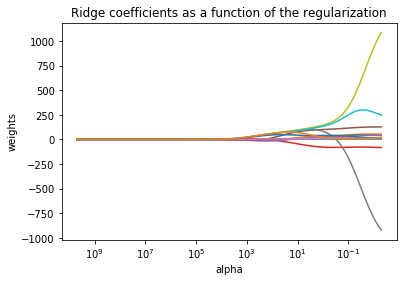

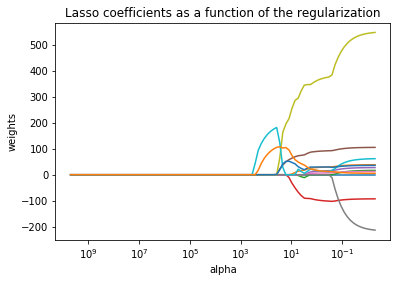

In [309]:
from sklearn import preprocessing
from sklearn import linear_model

X_scaled = preprocessing.scale(x_tr)
alphas =  10**np.linspace(10,-2,100)*0.5

coefs = []
for a in alphas:
    reg = linear_model.Ridge(alpha=a)
    reg.fit(X_scaled, y_tr)
    coefs.append(reg.coef_)

    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

import warnings
warnings.filterwarnings("ignore")

coefs = []
for a in alphas:
    reg = linear_model.Lasso(alpha=a)
    reg.fit(X_scaled, y_tr)
    coefs.append(reg.coef_)

    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


Here we can see that for both Lasso and Ridge, as the regularization parameter increases, the coefficient weights decrease. In the case of Lasso, some model attributes are dropped as the regularization parameter increases, while in ridge they merely converge to zero. 

3.

In [310]:
formula = 'Weight ~ Length1 + Length2 + Length3 + Height + Width+ Species'
Y, X = dmatrices(formula, df, return_type = 'dataframe')
y = Y['Weight'].values

Xtr_scaled = preprocessing.scale(x_tr)
Xte_scaled = preprocessing.scale(x_te)

linreg = linear_model.LinearRegression()
linreg.fit(Xtr_scaled, y_tr)

testpredictions = linreg.predict(Xte_scaled)
print('Mean absolute error (LinReg):', mean_absolute_error(y_te, testpredictions))
print('R^2 score (test):', r2_score(y_te, testpredictions))

Ridgereg = linear_model.Ridge(alpha=.005)
Ridgereg.fit(Xtr_scaled, y_tr)

Ridgepredictions = Ridgereg.predict(Xte_scaled)
print('Mean absolute error (Ridge):', mean_absolute_error(y_te, Ridgepredictions))
print('R^2 score (test):', r2_score(y_te, testpredictions))

Lassoreg = linear_model.Lasso(alpha=.005)
Lassoreg.fit(Xtr_scaled, y_tr)

Lassopredictions = Lassoreg.predict(Xte_scaled)
print('Mean absolute error (Lasso):', mean_absolute_error(y_te, Lassopredictions))
print('R^2 score (test):', r2_score(y_te, testpredictions))


Mean absolute error (LinReg): 113.38344317606482
R^2 score (test): 0.8835860566933711
Mean absolute error (Ridge): 112.54350214419537
R^2 score (test): 0.8835860566933711
Mean absolute error (Lasso): 107.7839340668697
R^2 score (test): 0.8835860566933711


4.

In [311]:
from sklearn.linear_model import LassoCV
reg = LassoCV(alphas = None, cv=5, max_iter=10000).fit(Xtr_scaled, y_tr)
print('optimal regularization parameter:', reg.alpha_)

Lassoreg = linear_model.Lasso(alpha=reg.alpha_)
Lassoreg.fit(Xtr_scaled, y_tr)

Lassopredictions = Lassoreg.predict(Xte_scaled)
print('Mean absolute error (Lasso):', mean_absolute_error(y_te, Lassopredictions))
print('R^2 score (test):', r2_score(y_te, testpredictions))
print('Lasso coefficients:', Lassoreg.coef_)

optimal regularization parameter: 0.7679867406236753
Mean absolute error (Lasso): 106.8374405970357
R^2 score (test): 0.8835860566933711
Lasso coefficients: [  0.          28.40240762  -0.         -98.47637233  14.06339884
  90.45284572   6.64918081   0.         366.39778107  14.99503861
  29.5948112   15.22798381]


Interestingly, the optimal regularization parameter chosen here (0.767) differs from that chosen through cross validation above (0.005)

5.

Scaling data before regularization accounts for outliers as well as attributes that are on a larger scale, ensuring that attributes are taken into account equally in the model. Regularization penalizes larger values so it is important to ensure everything's on the same scale beforehand. 

# Question 5 (5 pts)

Lasso and ridge regularization techniques are often used to combat overfitting during linear regression. Which of the two yields more sparse models (i.e. fewer number of parameters) when the tuning parameter $\lambda$ is sufficiently large (but not infinite)?

## Answer

Lasso regularization yields more sparse models when tuning parameter alpha is sufficiently large. This is because a lasso regression model will force some of the coefficient estimates to be equal to zero when the tuning parameter alpha is sufficiently large. In contrast, a ridge regression model will only shrink the coefficient estimates, but never actually making them equal to zero. Therefore, the ridge regression model will include all of the parameters in the end where as lasso will have dropped some (force coefficients equal to 0) by the final model.